In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2024-01-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2024_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-01-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7460,동래구,9375,동래구,1915,25.67%,"8,418"
1,2024-01-11,간장,오복왕표 0.9ℓ 1병,7500,동래구,8350,동래구,850,11.33%,"7,925"
2,2024-01-11,갈치,60cm정도 500g 1마리(냉동),8370,동래구,19800,동래구,11430,136.56%,"14,085"
3,2024-01-11,고등어,30㎝정도 500g 1마리,4900,동래구,4980,동래구,80,1.63%,"4,940"
4,2024-01-11,달걀,오경슈퍼란60g정도 10개,3990,동래구,4600,동래구,610,15.29%,"4,295"
5,2024-01-11,닭고기,육계 1.0㎏,7916,동래구,9990,동래구,2074,26.2%,"8,953"
6,2024-01-11,대파,1.0㎏,5200,동래구,6100,동래구,900,17.31%,"5,650"
7,2024-01-11,돼지고기,삼겹살 500g,8820,동래구,11510,동래구,2690,30.5%,"10,165"
8,2024-01-11,두부,500g 판두부(국산포장두부 420g) 1모,2707,동래구,6160,동래구,3453,127.56%,"4,434"
9,2024-01-11,라면,신라면 120g 1봉지,780,동래구,780,동래구,0,0.0%,780


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2024-04-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2024_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-04-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8625,동래구,10450,동래구,1825,21.16%,"9,538"
1,2024-04-11,간장,오복왕표 0.9ℓ 1병,7500,동래구,8350,동래구,850,11.33%,"7,925"
2,2024-04-11,갈치,60cm정도 500g 1마리(냉동),7450,동래구,19800,동래구,12350,165.77%,"13,625"
3,2024-04-11,고등어,30㎝정도 500g 1마리,4350,동래구,4916,동래구,566,13.01%,"4,633"
4,2024-04-11,달걀,오경슈퍼란60g정도 10개,3990,동래구,4600,동래구,610,15.29%,"4,295"
5,2024-04-11,닭고기,육계 1.0㎏,7916,동래구,10900,동래구,2984,37.7%,"9,408"
6,2024-04-11,대파,1.0㎏,4000,동래구,7000,동래구,3000,75.0%,"5,500"
7,2024-04-11,돼지고기,삼겹살 500g,9900,동래구,9940,동래구,40,0.4%,"9,920"
8,2024-04-11,두부,500g 판두부(국산포장두부 420g) 1모,4820,동래구,5194,동래구,374,7.76%,"5,007"
9,2024-04-11,라면,신라면 120g 1봉지,780,동래구,780,동래구,0,0.0%,780


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2024-07-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2024_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-07-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8625,동래구,10430,동래구,1805,20.93%,"9,528"
1,2024-07-11,간장,오복왕표 0.9ℓ 1병,7500,동래구,8350,동래구,850,11.33%,"7,925"
2,2024-07-11,갈치,60cm정도 500g 1마리(냉동),9050,동래구,19800,동래구,10750,118.78%,"14,425"
3,2024-07-11,고등어,30㎝정도 500g 1마리,4916,동래구,5730,동래구,814,16.56%,"5,323"
4,2024-07-11,달걀,오경슈퍼란60g정도 10개,3990,동래구,4600,동래구,610,15.29%,"4,295"
5,2024-07-11,닭고기,육계 1.0㎏,7916,동래구,10900,동래구,2984,37.7%,"9,408"
6,2024-07-11,대파,1.0㎏,3737,동래구,4250,동래구,513,13.73%,"3,994"
7,2024-07-11,돼지고기,삼겹살 500g,10450,동래구,14400,동래구,3950,37.8%,"12,425"
8,2024-07-11,두부,500g 판두부(국산포장두부 420g) 1모,5194,동래구,5720,동래구,526,10.13%,"5,457"
9,2024-07-11,라면,신라면 120g 1봉지,780,동래구,780,동래구,0,0.0%,780


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2024-10-17"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2024_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-10-17,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8625,동래구,10425,동래구,1800,20.87%,"9,525"
1,2024-10-17,간장,오복왕표 0.9ℓ 1병,8300,동래구,8710,동래구,410,4.94%,"8,505"
2,2024-10-17,고등어,30㎝정도 500g 1마리,4950,동래구,4990,동래구,40,0.81%,"4,970"
3,2024-10-17,달걀,오경슈퍼란60g정도 10개,3990,동래구,4600,동래구,610,15.29%,"4,295"
4,2024-10-17,닭고기,육계 1.0㎏,7916,동래구,10990,동래구,3074,38.83%,"9,453"
5,2024-10-17,대파,1.0㎏,4271,동래구,4280,동래구,9,0.21%,"4,276"
6,2024-10-17,돼지고기,삼겹살 500g,9600,동래구,15200,동래구,5600,58.33%,"12,400"
7,2024-10-17,두부,500g 판두부(국산포장두부 420g) 1모,5194,동래구,5760,동래구,566,10.9%,"5,477"
8,2024-10-17,라면,신라면 120g 1봉지,780,동래구,780,동래구,0,0.0%,780
9,2024-10-17,맥주,하이트 500㎖ 1병,1660,동래구,1680,동래구,20,1.2%,"1,670"


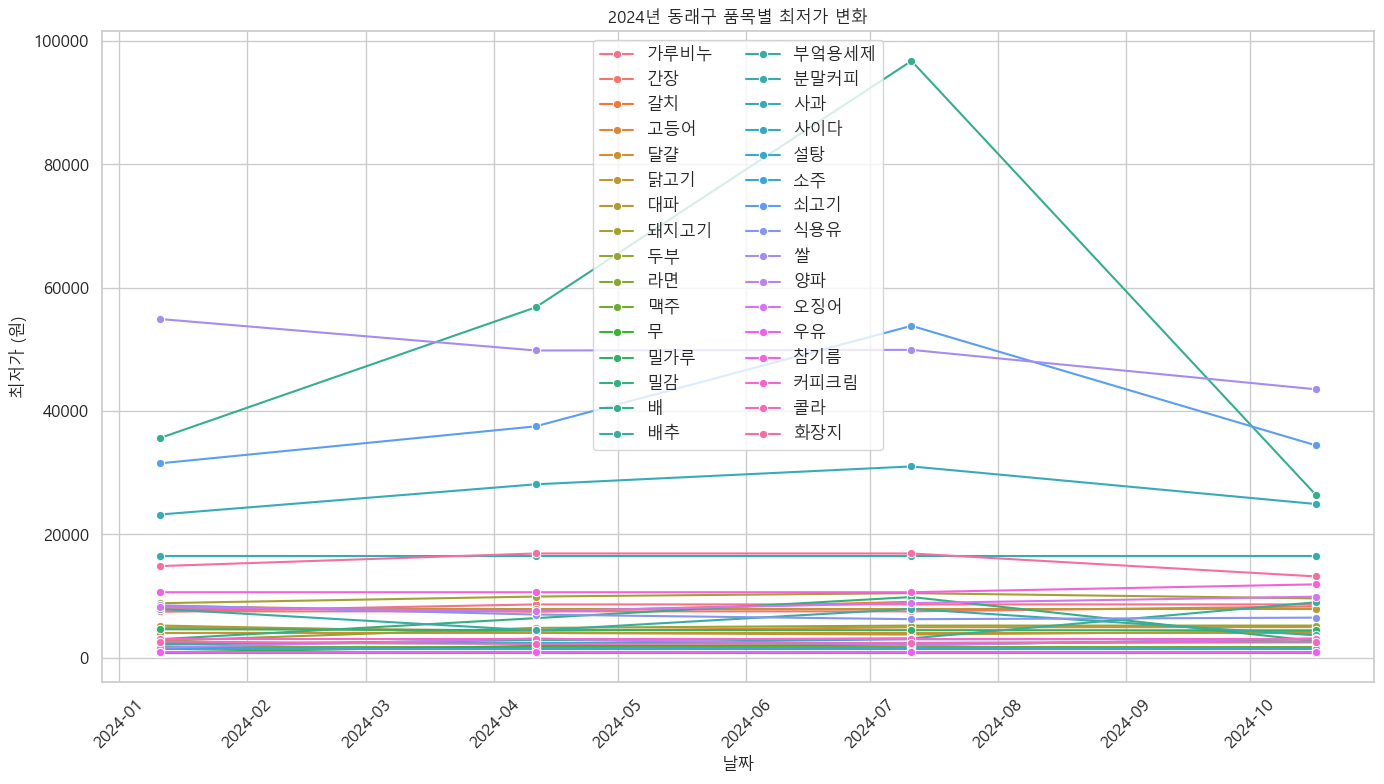

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2024_1q.csv")
q2 = pd.read_csv("동래구2024_2q.csv")
q3 = pd.read_csv("동래구2024_3q.csv")
q4 = pd.read_csv("동래구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 동래구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("동래구2024_min.csv", index=False, encoding="utf-8-sig")

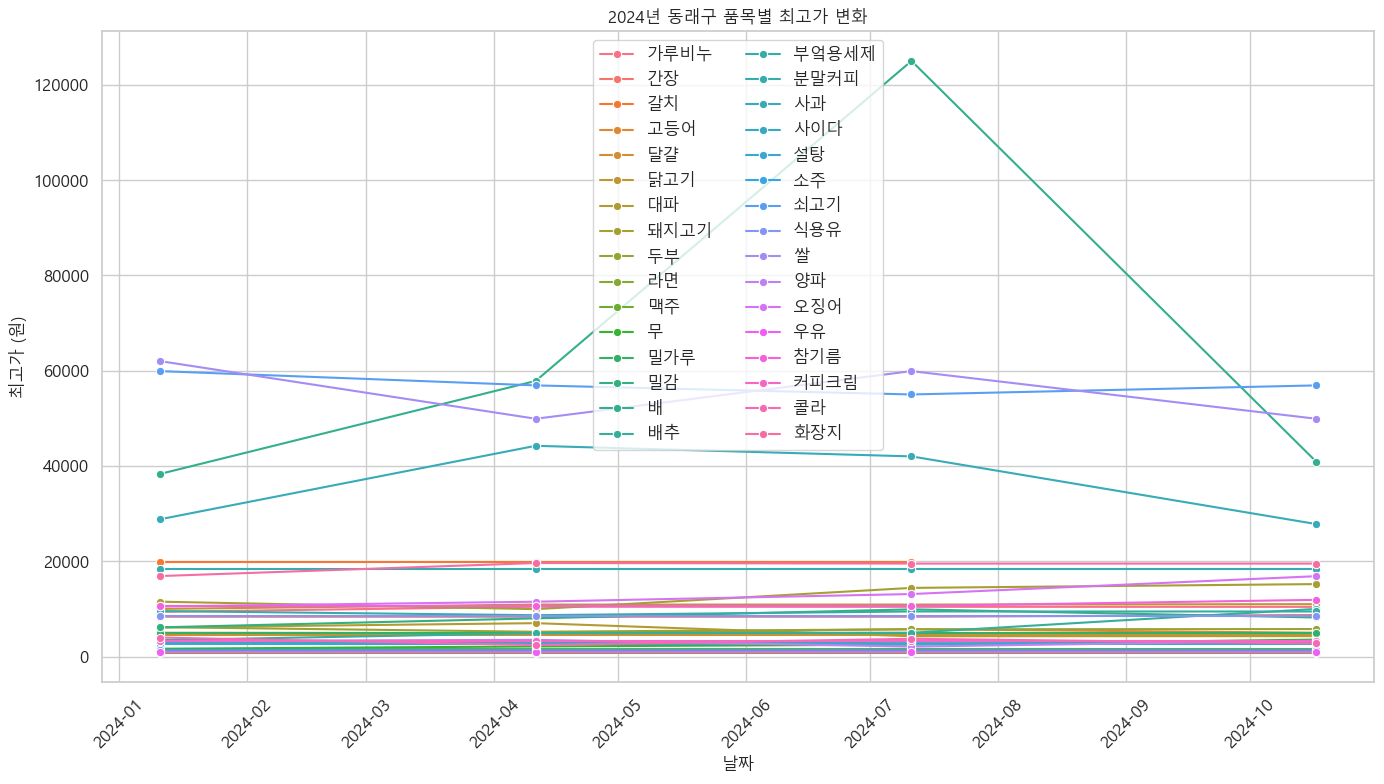

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2024_1q.csv")
q2 = pd.read_csv("동래구2024_2q.csv")
q3 = pd.read_csv("동래구2024_3q.csv")
q4 = pd.read_csv("동래구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 동래구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("동래구2024_max.csv", index=False, encoding="utf-8-sig")